Requirements

In [1]:
required_desc = [
'alcoholic', 'aldehydic', 'alliaceous', 'almond', 'amber', 'animal',
'anisic', 'apple', 'apricot', 'aromatic', 'balsamic', 'banana', 'beefy',
'bergamot', 'berry', 'bitter', 'black currant', 'brandy', 'burnt',
'buttery', 'cabbage', 'camphoreous', 'caramellic', 'cedar', 'celery',
'chamomile', 'cheesy', 'cherry', 'chocolate', 'cinnamon', 'citrus', 'clean',
'clove', 'cocoa', 'coconut', 'coffee', 'cognac', 'cooked', 'cooling',
'cortex', 'coumarinic', 'creamy', 'cucumber', 'dairy', 'dry', 'earthy',
'ethereal', 'fatty', 'fermented', 'fishy', 'floral', 'fresh', 'fruit skin',
'fruity', 'garlic', 'gassy', 'geranium', 'grape', 'grapefruit', 'grassy',
'green', 'hawthorn', 'hay', 'hazelnut', 'herbal', 'honey', 'hyacinth',
'jasmin', 'juicy', 'ketonic', 'lactonic', 'lavender', 'leafy', 'leathery',
'lemon', 'lily', 'malty', 'meaty', 'medicinal', 'melon', 'metallic',
'milky', 'mint', 'muguet', 'mushroom', 'musk', 'musty', 'natural', 'nutty',
'odorless', 'oily', 'onion', 'orange', 'orangeflower', 'orris', 'ozone',
'peach', 'pear', 'phenolic', 'pine', 'pineapple', 'plum', 'popcorn',
'potato', 'powdery', 'pungent', 'radish', 'raspberry', 'ripe', 'roasted',
'rose', 'rummy', 'sandalwood', 'savory', 'sharp', 'smoky', 'soapy',
'solvent', 'sour', 'spicy', 'strawberry', 'sulfurous', 'sweaty', 'sweet',
'tea', 'terpenic', 'tobacco', 'tomato', 'tropical', 'vanilla', 'vegetable',
'vetiver', 'violet', 'warm', 'waxy', 'weedy', 'winey', 'woody'
]

In [2]:
len(required_desc)

138

analysis

In [3]:
import pyrfume
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

/home/aryanab/anaconda3/envs/deepchem/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[raw]
"data_rw_opl.csv" = "Odor labels for molecules as originally compiled by John Leffingwell and cleaned by Sanchez-Lengeling et al"
"data_rw_odor.csv" = "Information about the dataset"
"data_rw_contents.csv" = "..."
LICENSE = "Licensing information and use restrictions according to the terms of The Goodscents Company"
"README.md" = "Additional information about this archive"

[parsed]
"opl.csv" = "Molecular structure data"

[processed]
"molecules.csv" = "Information about odorant molecules used"
"stimuli.csv" = "Mappings between PubChem IDs and GoodScents IDs, Concentration, and Solvent"
"behavior.csv" = "Odor descriptors for each molecule"

In [4]:
molecules = pyrfume.load_data('goodscents/molecules.csv', remote=True)
behavior = pyrfume.load_data('goodscents/behavior.csv', remote=True)
stimuli = pyrfume.load_data('goodscents/stimuli.csv', remote=True)
opl = pyrfume.load_data('goodscents/opl.csv', remote=True)

possible tests: molecules
- duplicate smiles?
- convert all smiles to canonical smiles then check
- check if all are valid smiles

In [5]:
molecules.head()

,MolecularWeight,IsomericSMILES,IUPACName,name
CID,,,,
4,75.11,CC(CN)O,1-aminopropan-2-ol,1-aminopropan-2-ol
49,116.11,CC(C)C(=O)C(=O)O,3-methyl-2-oxobutanoic acid,3-methyl-2-oxobutanoic acid
51,146.10,C(CC(=O)O)C(=O)C(=O)O,2-oxopentanedioic acid,2-ketoglutaric acid
58,102.09,CCC(=O)C(=O)O,2-oxobutanoic acid,2-oxobutanoic acid
70,130.14,CC(C)CC(=O)C(=O)O,4-methyl-2-oxopentanoic acid,4-methyl-2-oxopentanoic acid


In [6]:
molecules[molecules['name'].str.match('.*2,5-dimethyl-3-thioisovalerylfuran.*')]

,MolecularWeight,IsomericSMILES,IUPACName,name
CID,,,,
41570,212.31,CC1=CC(=C(O1)C)SC(=O)CC(C)C,"S-(2,5-dimethylfuran-3-yl) 3-methylbutanethioate","2,5-dimethyl-3-thioisovalerylfuran"


In [7]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4565 entries, 4 to 152743294
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MolecularWeight  4565 non-null   float64
 1   IsomericSMILES   4565 non-null   object 
 2   IUPACName        4559 non-null   object 
 3   name             4565 non-null   object 
dtypes: float64(1), object(3)
memory usage: 178.3+ KB


In [8]:
len(molecules['IsomericSMILES'].drop_duplicates())

4565

In [9]:
total_molecules = len(molecules['IsomericSMILES'].value_counts())
total_molecules

4565

In [10]:
from rdkit import Chem

def canonical_smiles(smiles):
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles = True)

In [11]:
molecules['canonicalSMILES'] = molecules['IsomericSMILES'].progress_apply(lambda x: canonical_smiles(x))
assert len(molecules['canonicalSMILES'].value_counts()) == total_molecules

100%|██████████| 4565/4565 [00:00<00:00, 7547.21it/s]


In [12]:
molecules = molecules.drop(columns=['canonicalSMILES'])

In [13]:
molecules.columns

Index(['MolecularWeight', 'IsomericSMILES', 'IUPACName', 'name'], dtype='object')

In [14]:
molecules['IsomericSMILES'][4]

'CC(CN)O'

possible tests: behavior
- basic
- count of unique behaviours available, maybe pivot table
- % count of each behaviour (sorted)

In [15]:
behavior.head()

,Descriptors
Stimulus,
100-06-1,sweet;vanilla;cherry maraschino cherry;powdery...
100-09-4,phenolic;animal;fecal;medicinal
100-42-5,sweet;plastic;floral;balsamic
100-51-6,sweet;floral;rose;fruity;phenolic;balsamic;che...
100-52-7,sweet;cherry;cherry maraschino cherry;nutty;fr...


In [16]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4626 entries, 100-06-1 to NF0825
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descriptors  4622 non-null   object
dtypes: object(1)
memory usage: 72.3+ KB


In [17]:
behavior_nan = behavior[behavior.isna().any(axis=1)]
behavior_nan

,Descriptors
Stimulus,
1523-19-9,NaN
53584-56-8,NaN
6698-82-0,NaN
78183-56-9,NaN


In [18]:
behavior_clean = behavior.dropna()
behavior_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 100-06-1 to NF0825
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descriptors  4622 non-null   object
dtypes: object(1)
memory usage: 72.2+ KB


original dataset analysis

In [19]:
og_cid_behaviors = pd.merge(behavior_clean['Descriptors'], stimuli, how='inner', left_index=True, right_index=True)
og_cid_behaviors.head(3)

,Descriptors,TGSC ID,CID,Concentration %,Solvent
Stimulus,,,,,
100-06-1,sweet;vanilla;cherry maraschino cherry;powdery...,1000111,7476,100.0,NaN
100-09-4,phenolic;animal;fecal;medicinal,1031871,7478,10.0,dipropylene glycol
100-42-5,sweet;plastic;floral;balsamic,1009281,7501,0.1,triacetin


In [20]:
og_cid_behaviors[og_cid_behaviors['CID']==41570]

,Descriptors,TGSC ID,CID,Concentration %,Solvent
Stimulus,,,,,
55764-28-8,roasted,1036451,41570,0.1,propylene glycol


In [21]:
dup = og_cid_behaviors[og_cid_behaviors['CID'].duplicated(keep=False)]
index_set = set()
index_set.update(dup['CID'].to_list())
list_idx_of_duplicates = []
for i in index_set:
    # print(list(dup[dup['CID'] == i].index))
    list_idx_of_duplicates.append(list(dup[dup['CID'] == i].index))
list_idx_of_duplicates

[['2623-23-6', '89-48-5'],
 ['91069-39-5', '91069-40-8'],
 ['137886-38-5', '22451-50-9'],
 ['29759-11-3', '93-92-5'],
 ['110-93-0', '409-02-9'],
 ['141-25-3', '26489-01-0'],
 ['1321-89-7', '3085-26-5'],
 ['25773-40-4', '93905-03-4'],
 ['6728-26-3', '85761-70-2'],
 ['7704-34-9', '7783-06-4'],
 ['41199-19-3', '71832-76-3'],
 ['1334-82-3', '4996-48-9'],
 ['55764-31-3', '65505-16-0'],
 ['1118-39-4', '69103-01-1'],
 ['15537-55-0', '546-79-2'],
 ['1329-99-3', '99-83-2'],
 ['334-49-6', '72881-27-7'],
 ['1365-19-1', '60047-17-8'],
 ['138-86-3', '9003-73-0'],
 ['1337-83-3', '143-14-6'],
 ['13952-84-6', '513-49-5'],
 ['67859-99-8', '67874-69-5'],
 ['13828-37-0', '5502-75-0'],
 ['39872-57-6', '70266-48-7'],
 ['63450-30-6', '68378-13-2'],
 ['1335-86-0', '591-49-1'],
 ['139-33-3', '6381-92-6'],
 ['25524-95-2', '34686-71-0'],
 ['75640-26-5', '80417-97-6'],
 ['111-60-4', '9004-99-3'],
 ['23696-85-7', '23726-93-4'],
 ['80722-28-7', '80957-74-0'],
 ['16423-19-1', '5173-69-3'],
 ['1334-78-7', '620-23-5'

In [22]:
og_cid_behaviors['Descriptors_old'] = og_cid_behaviors.loc[:, 'Descriptors']
og_cid_behaviors.head()

for dup_set in list_idx_of_duplicates:
    desc_set = set()
    desc_string = ';'.join(og_cid_behaviors['Descriptors'][dup_set].to_list())
    for desc in desc_string.split(';'):
        if desc == 'odorless':
            continue
        desc_set.update([desc])
    if len(desc_set) == 0:
        desc_set.update(['odorless'])
    new_desc_string = ';'.join(desc_set)
    og_cid_behaviors['Descriptors'][dup_set] = new_desc_string

og_cid_behaviors = og_cid_behaviors.drop_duplicates('CID', keep='first')
og_cid_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4561 entries, 100-06-1 to NF0825
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Descriptors      4561 non-null   object 
 1   TGSC ID          4561 non-null   int64  
 2   CID              4561 non-null   int64  
 3   Concentration %  4080 non-null   float64
 4   Solvent          1823 non-null   object 
 5   Descriptors_old  4561 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 249.4+ KB


/tmp/ipykernel_67313/767019178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_cid_behaviors['Descriptors'][dup_set] = new_desc_string
/tmp/ipykernel_67313/767019178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_cid_behaviors['Descriptors'][dup_set] = new_desc_string
/tmp/ipykernel_67313/767019178.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_cid_behaviors['Descriptors'][dup_set] = new_desc_string
/tmp/ipyke

In [23]:
og_cid_behaviors_mol = pd.merge(molecules['IsomericSMILES'], og_cid_behaviors[['Descriptors', 'CID']],how='inner', on='CID')
og_cid_behaviors_mol.head()

,CID,IsomericSMILES,Descriptors
0,4,CC(CN)O,fishy
1,49,CC(C)C(=O)C(=O)O,fruity
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless
3,58,CCC(=O)C(=O)O,sweet;caramellic;creamy;brown;lactonic
4,70,CC(C)CC(=O)C(=O)O,fruity


In [24]:
og_encoded = og_cid_behaviors_mol['Descriptors'].str.get_dummies(sep=';')
og_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Columns: 667 entries, absinthe to zesty
dtypes: int64(667)
memory usage: 23.2 MB


In [25]:
pd.DataFrame(og_encoded.sum(axis=1).sort_values()).groupby(by=0).size()
# number of desc | number of molecules

0
1     721
2     674
3     612
4     594
5     531
6     405
7     308
8     257
9     159
10    141
11     83
12     36
13     14
14     13
15      7
16      4
17      2
dtype: int64

In [26]:
# molecules with no descriptors
pd.DataFrame(og_encoded.sum(axis=1).sort_values(), columns=['count']).query('count==0')

,count


In [27]:
mols_per_desc = dict(og_encoded.sum().sort_values(ascending=False))
mols_per_desc

{'fruity': 1243,
 'green': 1064,
 'sweet': 1004,
 'floral': 900,
 'woody': 616,
 'herbal': 551,
 'fatty': 401,
 'fresh': 380,
 'waxy': 376,
 'spicy': 351,
 'citrus': 293,
 'rose': 270,
 'sulfurous': 251,
 'earthy': 244,
 'nutty': 236,
 'tropical': 234,
 'odorless': 221,
 'balsamic': 220,
 'oily': 217,
 'minty': 187,
 'vegetable': 182,
 'powdery': 171,
 'musty': 158,
 'meaty': 158,
 'creamy': 148,
 'pineapple': 147,
 'apple': 145,
 'roasted': 138,
 'aldehydic': 138,
 'phenolic': 134,
 'ethereal': 134,
 'caramellic': 133,
 'dry': 129,
 'berry': 121,
 'metallic': 117,
 'pungent': 110,
 'honey': 110,
 'camphoreous': 110,
 'onion': 96,
 'leafy': 96,
 'animal': 95,
 'jasmin': 93,
 'clean': 90,
 'pear': 90,
 'winey': 90,
 'bland': 90,
 'musk': 89,
 'melon': 88,
 'coconut': 86,
 'cheesy': 85,
 'amber': 84,
 'mushroom': 80,
 'banana': 80,
 'coffee': 76,
 'cooling': 75,
 'buttery': 75,
 'vanilla': 73,
 'garlic': 73,
 'alliaceous': 72,
 'pine': 72,
 'natural': 68,
 'peach': 68,
 'mild': 68,
 'dai

In [28]:
mols_per_desc['medical']

1

In [29]:
mols_per_desc['medicinal']

55

In [30]:
og_cid_behaviors_mol.apply(lambda x: print(x) if ('medical' in x['Descriptors'].split(';')) else '', axis=1)

CID                              7924
IsomericSMILES           CC1COC(=O)O1
Descriptors       minty;spicy;medical
Name: 424, dtype: object


0        
1        
2        
3        
4        
       ..
4556     
4557     
4558     
4559     
4560     
Length: 4561, dtype: object

handling labels

In [31]:
def get_odors(desc, odor_list):
    odors = desc.split(';')
    for i in odors:
        if i not in odor_list:
            odor_list.append(i)

In [32]:
odor_list = []
behavior_clean['Descriptors'].apply(lambda x: get_odors(x, odor_list))
odor_list.sort()
odor_list

['absinthe',
 'absolute',
 'acacia',
 'acetaldehyde',
 'acetic',
 'acetone',
 'acidic',
 'acorn',
 'acrylate',
 'agarwood',
 'alcoholic',
 'aldehydic',
 'algae',
 'alkane',
 'alliaceous',
 'allspice',
 'almond',
 'almond bitter almond',
 'almond roasted almond',
 'almond toasted almond',
 'almost odorless',
 'amber',
 'ambergris',
 'ambrette',
 'amine',
 'ammonia',
 'ammoniacal',
 'angelica',
 'animal',
 'anise',
 'anisic',
 'apple',
 'apple cooked apple',
 'apple dried apple',
 'apple green apple',
 'apple skin',
 'apricot',
 'armoise',
 'aromatic',
 'arrack',
 'artichoke',
 'asparagus',
 'astringent',
 'autumn',
 'bacon',
 'baked',
 'balsam',
 'balsamic',
 'banana',
 'banana peel',
 'banana ripe banana',
 'banana unripe banana',
 'barley roasted barley',
 'basil',
 'bay',
 'bean green bean',
 'beany',
 'beef',
 'beef juice',
 'beefy',
 'beefy roasted beefy',
 'beeswax',
 'benzaldehyde',
 'benzoate',
 'benzoin',
 'bergamot',
 'berry',
 'berry ripe berry',
 'bitter',
 'blackberry',
 'b

In [33]:
len(odor_list)

667

In [34]:
odors_df = pd.DataFrame(odor_list, columns=['desc'])
odors_df

,desc
0,absinthe
1,absolute
2,acacia
3,acetaldehyde
4,acetic
...,...
662,worty
663,yeasty
664,ylang
665,yogurt


In [35]:
odors_df[odors_df['desc'].str.match('amber.*')]

,desc
21,amber
22,ambergris


In [36]:
def desc_analyser():
    for desc in required_desc:
        odor_set = odors_df[odors_df['desc'].str.match(f'.* {desc}.*|.*{desc} .*|{desc}')]
        if len(odor_set) > 1:
            yield(desc, odor_set)
gen = desc_analyser()

In [37]:
merger_dict = {}
for out in desc_analyser():
    merger_dict[out[0]] = list(out[1]['desc'])
merger_dict

{'almond': ['almond',
  'almond bitter almond',
  'almond roasted almond',
  'almond toasted almond'],
 'amber': ['amber', 'ambergris'],
 'apple': ['apple',
  'apple cooked apple',
  'apple dried apple',
  'apple green apple',
  'apple skin'],
 'banana': ['banana',
  'banana peel',
  'banana ripe banana',
  'banana unripe banana'],
 'beefy': ['beefy', 'beefy roasted beefy'],
 'berry': ['berry', 'berry ripe berry'],
 'bitter': ['almond bitter almond', 'bitter', 'orange bitter orange'],
 'black currant': ['currant black currant', 'currant bud black currant bud'],
 'burnt': ['burnt', 'sugar burnt sugar', 'woody burnt wood'],
 'cedar': ['cedar', 'cedarwood'],
 'cheesy': ['cheesy',
  'cheesy bleu cheese',
  'cheesy feta cheese',
  'cheesy limburger cheese',
  'cheesy parmesan cheese',
  'cheesy roquefort cheese'],
 'cherry': ['cherry', 'cherry maraschino cherry'],
 'chocolate': ['chocolate', 'chocolate dark chocolate'],
 'citrus': ['citrus', 'citrus peel', 'citrus rind'],
 'clove': ['clove'

In [38]:
# manual correction
merger_dict['orange'] = ['orange', 'orange bitter orange', 'orange peel', 'orange rind']
merger_dict['grape'] = ['concord grape', 'grape', 'grape skin']
merger_dict['grassy'] = ['lemongrass']
merger_dict['lactonic'] = ['woody-lactone']
merger_dict['leafy'] = ['tomato leaf', 'violet leaf']
merger_dict['fruit skin'] = ['apple skin', 'grape skin', 'pear skin', 'plum skin', 'orange peel', 'banana peel', 'citrus peel', 'grapefruit peel', 'lemon peel']
merger_dict['fruity'] = ['fruit tropical fruit', 'juicy fruit', 'fruit overripe fruit', 'fruit ripe fruit']
merger_dict['dry'] = ['apple dried apple', 'rose dried rose']


del merger_dict['pine']

In [39]:
from collections import defaultdict
reverse_merger_dict = defaultdict(list)
for key, values in merger_dict.items():
    for value in values:
        reverse_merger_dict[value].append(key)

In [40]:
'apple skin' in reverse_merger_dict.keys()

True

In [41]:
def update_desc(desc_string):
    desc_list = desc_string.split(';')
    new_odors = set()
    flag = 0
    for desc in desc_list:
        flag = 0
        for old_desc, new_desc in reverse_merger_dict.items():
            if desc == old_desc:
                new_odors.update(new_desc)
                flag = 1
                break
        if flag==0:
            new_odors.update([desc])
    return ';'.join(new_odors)

In [42]:
update_desc("phenolic;animal;fecal;medicinal")

'phenolic;animal;fecal;medicinal'

In [43]:
update_desc("sweet;cherry;cherry maraschino cherry;nutty")

'nutty;cherry;sweet'

In [44]:
behavior_clean.head(
)

,Descriptors
Stimulus,
100-06-1,sweet;vanilla;cherry maraschino cherry;powdery...
100-09-4,phenolic;animal;fecal;medicinal
100-42-5,sweet;plastic;floral;balsamic
100-51-6,sweet;floral;rose;fruity;phenolic;balsamic;che...
100-52-7,sweet;cherry;cherry maraschino cherry;nutty;fr...


In [45]:
behavior_clean['Updated_Desc'] = behavior_clean['Descriptors'].apply(lambda x: update_desc(x))

/tmp/ipykernel_67313/483659658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_clean['Updated_Desc'] = behavior_clean['Descriptors'].apply(lambda x: update_desc(x))


In [46]:
behavior_clean.head()

,Descriptors,Updated_Desc
Stimulus,,
100-06-1,sweet;vanilla;cherry maraschino cherry;powdery...,hawthorn;balsamic;cherry;anisic;powdery;vanill...
100-09-4,phenolic;animal;fecal;medicinal,phenolic;animal;fecal;medicinal
100-42-5,sweet;plastic;floral;balsamic,balsamic;plastic;sweet;floral
100-51-6,sweet;floral;rose;fruity;phenolic;balsamic;che...,balsamic;fruity;floral;chemical;rose;phenolic;...
100-52-7,sweet;cherry;cherry maraschino cherry;nutty;fr...,nutty;cherry;sharp;fruity;powdery;almond;bitte...


In [47]:
behavior_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 100-06-1 to NF0825
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Descriptors   4622 non-null   object
 1   Updated_Desc  4622 non-null   object
dtypes: object(2)
memory usage: 237.4+ KB


In [48]:
odor_list = []
behavior_clean['Updated_Desc'].apply(lambda x: get_odors(x, odor_list))
odor_list.sort()
odor_list

['absinthe',
 'absolute',
 'acacia',
 'acetaldehyde',
 'acetic',
 'acetone',
 'acidic',
 'acorn',
 'acrylate',
 'agarwood',
 'alcoholic',
 'aldehydic',
 'algae',
 'alkane',
 'alliaceous',
 'allspice',
 'almond',
 'amber',
 'ambrette',
 'amine',
 'ammonia',
 'ammoniacal',
 'angelica',
 'animal',
 'anise',
 'anisic',
 'apple',
 'apricot',
 'armoise',
 'aromatic',
 'arrack',
 'artichoke',
 'asparagus',
 'astringent',
 'autumn',
 'bacon',
 'baked',
 'balsam',
 'balsamic',
 'banana',
 'basil',
 'bay',
 'beany',
 'beef',
 'beef juice',
 'beefy',
 'beeswax',
 'benzaldehyde',
 'benzoate',
 'benzoin',
 'bergamot',
 'berry',
 'bitter',
 'black currant',
 'blackberry',
 'bland',
 'bloody',
 'blossom',
 'blueberry',
 'boiled',
 'bois',
 'bonbon',
 'borneol',
 'boronia',
 'bouillon',
 'brandy',
 'bread',
 'bread baked',
 'bread crust',
 'bread rye bread',
 'bready',
 'broccoli',
 'brothy',
 'brown',
 'bubble gum',
 'buchu',
 'bud',
 'burnt',
 'butter',
 'butter rancid',
 'buttermilk',
 'butterscotc

In [49]:
len(odor_list)

585

In [50]:
stimuli.head()

,TGSC ID,CID,Concentration %,Solvent
Stimulus,,,,
100-06-1,1000111,7476,100.0,NaN
100-09-4,1031871,7478,10.0,dipropylene glycol
100-42-5,1009281,7501,0.1,triacetin
100-51-6,1001651,244,100.0,NaN
100-52-7,1001491,240,10.0,dipropylene glycol


In [51]:
dup = stimuli[stimuli['CID'].duplicated(keep=False)]
index_set = set()
index_set.update(dup['CID'].to_list())
for i in index_set:
    print(dup[dup['CID'] == i])
    print()

           TGSC ID     CID  Concentration % Solvent
Stimulus                                           
2623-23-6  1002031  220674            100.0     NaN
89-48-5    1046271  220674            100.0     NaN

            TGSC ID       CID  Concentration %             Solvent
Stimulus                                                          
91069-39-5  1537621  18598146              1.0  dipropylene glycol
91069-40-8  1537631  18598146              1.0  dipropylene glycol

             TGSC ID     CID  Concentration % Solvent
Stimulus                                             
137886-38-5  1587131  527108            100.0     NaN
22451-50-9   1593881  527108            100.0     NaN

            TGSC ID    CID  Concentration %             Solvent
Stimulus                                                       
29759-11-3  1412121  62341              1.0  dipropylene glycol
93-92-5     1011091  62341             10.0  dipropylene glycol

          TGSC ID   CID  Concentration %        

In [52]:
len(dup['CID'].to_list())

119

In [53]:
stimuli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4626 entries, 100-06-1 to NF0825
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TGSC ID          4626 non-null   int64  
 1   CID              4626 non-null   int64  
 2   Concentration %  4137 non-null   float64
 3   Solvent          1850 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 309.7+ KB


In [54]:
cid_behaviors = pd.merge(behavior_clean['Updated_Desc'], stimuli, how='inner', left_index=True, right_index=True)
cid_behaviors.head(3)

,Updated_Desc,TGSC ID,CID,Concentration %,Solvent
Stimulus,,,,,
100-06-1,hawthorn;balsamic;cherry;anisic;powdery;vanill...,1000111,7476,100.0,NaN
100-09-4,phenolic;animal;fecal;medicinal,1031871,7478,10.0,dipropylene glycol
100-42-5,balsamic;plastic;sweet;floral,1009281,7501,0.1,triacetin


In [55]:
cid_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 100-06-1 to NF0825
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Updated_Desc     4622 non-null   object 
 1   TGSC ID          4622 non-null   int64  
 2   CID              4622 non-null   int64  
 3   Concentration %  4135 non-null   float64
 4   Solvent          1850 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 216.7+ KB


In [56]:
dup = cid_behaviors[cid_behaviors['CID'].duplicated(keep=False)]
index_set = set()
index_set.update(dup['CID'].to_list())
list_idx_of_duplicates = []
for i in index_set:
    # print(list(dup[dup['CID'] == i].index))
    list_idx_of_duplicates.append(list(dup[dup['CID'] == i].index))
list_idx_of_duplicates

[['2623-23-6', '89-48-5'],
 ['91069-39-5', '91069-40-8'],
 ['137886-38-5', '22451-50-9'],
 ['29759-11-3', '93-92-5'],
 ['110-93-0', '409-02-9'],
 ['141-25-3', '26489-01-0'],
 ['1321-89-7', '3085-26-5'],
 ['25773-40-4', '93905-03-4'],
 ['6728-26-3', '85761-70-2'],
 ['7704-34-9', '7783-06-4'],
 ['41199-19-3', '71832-76-3'],
 ['1334-82-3', '4996-48-9'],
 ['55764-31-3', '65505-16-0'],
 ['1118-39-4', '69103-01-1'],
 ['15537-55-0', '546-79-2'],
 ['1329-99-3', '99-83-2'],
 ['334-49-6', '72881-27-7'],
 ['1365-19-1', '60047-17-8'],
 ['138-86-3', '9003-73-0'],
 ['1337-83-3', '143-14-6'],
 ['13952-84-6', '513-49-5'],
 ['67859-99-8', '67874-69-5'],
 ['13828-37-0', '5502-75-0'],
 ['39872-57-6', '70266-48-7'],
 ['63450-30-6', '68378-13-2'],
 ['1335-86-0', '591-49-1'],
 ['139-33-3', '6381-92-6'],
 ['25524-95-2', '34686-71-0'],
 ['75640-26-5', '80417-97-6'],
 ['111-60-4', '9004-99-3'],
 ['23696-85-7', '23726-93-4'],
 ['80722-28-7', '80957-74-0'],
 ['16423-19-1', '5173-69-3'],
 ['1334-78-7', '620-23-5'

In [57]:
cid_behaviors['Updated_Desc_old'] = cid_behaviors.loc[:, 'Updated_Desc']
cid_behaviors.head()

,Updated_Desc,TGSC ID,CID,Concentration %,Solvent,Updated_Desc_old
Stimulus,,,,,,
100-06-1,hawthorn;balsamic;cherry;anisic;powdery;vanill...,1000111,7476,100.0,NaN,hawthorn;balsamic;cherry;anisic;powdery;vanill...
100-09-4,phenolic;animal;fecal;medicinal,1031871,7478,10.0,dipropylene glycol,phenolic;animal;fecal;medicinal
100-42-5,balsamic;plastic;sweet;floral,1009281,7501,0.1,triacetin,balsamic;plastic;sweet;floral
100-51-6,balsamic;fruity;floral;chemical;rose;phenolic;...,1001651,244,100.0,NaN,balsamic;fruity;floral;chemical;rose;phenolic;...
100-52-7,nutty;cherry;sharp;fruity;powdery;almond;bitte...,1001491,240,10.0,dipropylene glycol,nutty;cherry;sharp;fruity;powdery;almond;bitte...


In [58]:
for dup_set in list_idx_of_duplicates:
    desc_set = set()
    desc_string = ';'.join(cid_behaviors['Updated_Desc'][dup_set].to_list())
    for desc in desc_string.split(';'):
        if desc == 'odorless':
            continue
        desc_set.update([desc])
    if len(desc_set) == 0:
        desc_set.update(['odorless'])
    new_desc_string = ';'.join(desc_set)
    cid_behaviors['Updated_Desc'][dup_set] = new_desc_string


/tmp/ipykernel_67313/1922628141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cid_behaviors['Updated_Desc'][dup_set] = new_desc_string
/tmp/ipykernel_67313/1922628141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cid_behaviors['Updated_Desc'][dup_set] = new_desc_string
/tmp/ipykernel_67313/1922628141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cid_behaviors['Updated_Desc'][dup_set] = new_desc_string
/tmp/ipykerne

In [59]:
cid_behaviors = cid_behaviors.drop_duplicates('CID', keep='first')

In [60]:
cid_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4561 entries, 100-06-1 to NF0825
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Updated_Desc      4561 non-null   object 
 1   TGSC ID           4561 non-null   int64  
 2   CID               4561 non-null   int64  
 3   Concentration %   4080 non-null   float64
 4   Solvent           1823 non-null   object 
 5   Updated_Desc_old  4561 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 249.4+ KB


In [61]:
dup = cid_behaviors[cid_behaviors['CID'].duplicated(keep=False)]
# index_set = set()
# index_set.update(dup['CID'].to_list())
# list_idx_of_duplicates = []
# for i in index_set:
#     print(dup[dup['CID'] == i])
len(dup)

0

In [62]:
cid_behaviors_mol = pd.merge(molecules['IsomericSMILES'], cid_behaviors[['Updated_Desc', 'CID']],how='inner', on='CID')
cid_behaviors_mol.head()

,CID,IsomericSMILES,Updated_Desc
0,4,CC(CN)O,fishy
1,49,CC(C)C(=O)C(=O)O,fruity
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless
3,58,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet
4,70,CC(C)CC(=O)C(=O)O,fruity


In [63]:
cid_behaviors_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CID             4561 non-null   int64 
 1   IsomericSMILES  4561 non-null   object
 2   Updated_Desc    4561 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.0+ KB


In [64]:
cid_behaviors_mol[cid_behaviors_mol.duplicated(keep=False)]

,CID,IsomericSMILES,Updated_Desc


In [65]:
# cid_behaviors_mol = cid_behaviors_mol.drop_duplicates(keep='first').reset_index(drop=True)
# cid_behaviors_mol.info()

In [66]:
cid_behaviors_mol.head()

,CID,IsomericSMILES,Updated_Desc
0,4,CC(CN)O,fishy
1,49,CC(C)C(=O)C(=O)O,fruity
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless
3,58,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet
4,70,CC(C)CC(=O)C(=O)O,fruity


In [67]:
odor_dummies = cid_behaviors_mol['Updated_Desc'].str.get_dummies(sep=';')
odor_dummies['fruity'].head()

0    0
1    1
2    0
3    0
4    1
Name: fruity, dtype: int64

In [68]:
cid_behaviors_mol_encoded = pd.concat([cid_behaviors_mol, odor_dummies], axis=1)


Updated behavior mol dataset

In [69]:
cid_behaviors_mol_encoded.head()

,CID,IsomericSMILES,Updated_Desc,absinthe,absolute,acacia,acetaldehyde,acetic,acetone,acidic,...,winey,wintergreen,wood,woody,wormwood,worty,yeasty,ylang,yogurt,zesty
0,4,CC(CN)O,fishy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,CC(C)C(=O)C(=O)O,fruity,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,CC(C)CC(=O)C(=O)O,fruity,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
odor_list = []
cid_behaviors_mol_encoded['Updated_Desc'].apply(lambda x: get_odors(x, odor_list))
odor_list.sort()
len(odor_list)

585

In [71]:
new_odors_df = pd.DataFrame(odor_list, columns=['desc'])

In [72]:
new_odors_df[new_odors_df['desc'].str.match('.*skin*')]

,desc
232,fruit skin
379,nut skin
493,skin


In [73]:
import nltk
nltk.download('snowball_data')
from nltk.stem import SnowballStemmer

# Initialize the SnowballStemmer for English
stemmer = SnowballStemmer('english')

def desc_stem_analyser():
    for desc in required_desc:
        root = stemmer.stem(desc)
        odor_set = new_odors_df[new_odors_df['desc'].str.match(f'.*{root}.*')]
        if len(odor_set) > 1:
            yield(desc, odor_set)
gen = desc_stem_analyser()

[nltk_data] Downloading package snowball_data to
[nltk_data]     /home/aryanab/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


In [74]:
next(gen)

('aldehydic',
             desc
 3   acetaldehyde
 11     aldehydic
 47  benzaldehyde)

In [75]:
merger_dict_v2 = {}
for out in desc_stem_analyser():
    merger_dict_v2[out[0]] = list(out[1]['desc'])
merger_dict_v2

{'aldehydic': ['acetaldehyde', 'aldehydic', 'benzaldehyde'],
 'anisic': ['anise', 'anisic'],
 'apple': ['apple', 'pineapple'],
 'balsamic': ['balsam', 'balsamic', 'tolu balsam'],
 'camphoreous': ['camphor', 'camphoreous'],
 'caramellic': ['caramel', 'caramellic'],
 'cooked': ['cooked', 'cookie'],
 'cooling': ['cool', 'cooling'],
 'coumarinic': ['coumarin', 'coumarinic'],
 'dry': ['dried', 'fruit dried fruit'],
 'ethereal': ['ether', 'ethereal'],
 'grape': ['grape', 'grapefruit'],
 'green': ['green', 'wintergreen'],
 'lactonic': ['lactone', 'lactonic'],
 'melon': ['melon', 'watermelon'],
 'metallic': ['metal', 'metallic'],
 'mint': ['cornmint', 'mint', 'peppermint', 'spearmint'],
 'musk': ['musk', 'nitromusk'],
 'orange': ['orange', 'orangeflower'],
 'pear': ['pear', 'spearmint'],
 'pine': ['pine', 'pineapple'],
 'radish': ['horseradish', 'radish'],
 'rose': ['rose', 'tuberose'],
 'sulfurous': ['sulfurous', 'sulfury'],
 'terpenic': ['terpene', 'terpenic', 'terpentine']}

In [76]:
keys_to_remove = ['aldehydic', 'apple', 'cooked', 'dry', 'grape', 'green', 'melon', 'mint', 'orange', 'pear', 'pine', 'radish', 'rose']
for key in keys_to_remove:
    del merger_dict_v2[key]
merger_dict_v2['musk'] = ['musk', 'nitromusk', 'ambrette']
merger_dict_v2

{'anisic': ['anise', 'anisic'],
 'balsamic': ['balsam', 'balsamic', 'tolu balsam'],
 'camphoreous': ['camphor', 'camphoreous'],
 'caramellic': ['caramel', 'caramellic'],
 'cooling': ['cool', 'cooling'],
 'coumarinic': ['coumarin', 'coumarinic'],
 'ethereal': ['ether', 'ethereal'],
 'lactonic': ['lactone', 'lactonic'],
 'metallic': ['metal', 'metallic'],
 'musk': ['musk', 'nitromusk', 'ambrette'],
 'sulfurous': ['sulfurous', 'sulfury'],
 'terpenic': ['terpene', 'terpenic', 'terpentine']}

In [77]:
def desc_suffix_analyser():
    for desc in required_desc:
        root = desc[:-2]
        odor_set = new_odors_df[new_odors_df['desc'].str.match(f'.*{root}.*')]
        if len(odor_set) > 1:
            yield(desc, odor_set)
gen = desc_suffix_analyser()

In [78]:
next(gen)

('aldehydic',
             desc
 3   acetaldehyde
 11     aldehydic
 47  benzaldehyde)

In [79]:
to_be_checked = ['beefy', 'buttery', 'cheesy', 'cinnamon', 'citrus', 'fatty', 'fishy', 'fruity', 'grape', 'grassy', 'hay', 'herbal', 'leafy', 'leathery', 'meaty', 'milky', 'nutty', 'oily', 'radish', 'rose', 'rummy', 'smoky', 'spicy', 'sweaty', 'sweet', 'winey', 'woody']

In [80]:
merger_dict_v3 = {}
for out in desc_suffix_analyser():
    # # manual selection
    # choice = input(out)
    # if choice == '1':
    if out[0] in to_be_checked:
        merger_dict_v3[out[0]] = list(out[1]['desc'])
merger_dict_v3

{'beefy': ['beef', 'beef juice', 'beefy', 'beeswax', 'root beer'],
 'buttery': ['butter',
  'butter rancid',
  'buttermilk',
  'butterscotch',
  'buttery',
  'peanut butter'],
 'cheesy': ['cheese', 'cheesy', 'lychee'],
 'cinnamon': ['cinnamon', 'cinnamyl'],
 'citrus': ['citral',
  'citralva',
  'citric',
  'citronella',
  'citronellal',
  'citrus'],
 'fatty': ['chicken fat', 'fatty'],
 'fishy': ['fish', 'fishy', 'shellfish'],
 'fruity': ['fruit',
  'fruit dried fruit',
  'fruit skin',
  'fruity',
  'grapefruit',
  'grapfruit',
  'jackfruit',
  'passion fruit',
  'starfruit'],
 'grape': ['fragrant',
  'graham cracker',
  'grain',
  'grain toasted grain',
  'grape',
  'grapefruit',
  'grapfruit',
  'grass',
  'grassy',
  'gravy',
  'petitgrain',
  'pomegranate'],
 'grassy': ['grass', 'grassy'],
 'hay': ['absinthe',
  'acetaldehyde',
  'alcoholic',
  'aldehydic',
  'artichoke',
  'benzaldehyde',
  'brothy',
  'buchu',
  'butterscotch',
  'camphor',
  'camphoreous',
  'cashew',
  'catechu'

In [81]:
merger_dict_v3['sweaty']

['sweat', 'sweaty']

In [82]:
# manually update the merger_dict_v3
merger_dict_v3['beefy'] = ['beef', 'beef juice', 'beefy']
merger_dict_v3['buttery'] = ['butter', 'buttery']
merger_dict_v3['cheesy'] = ['cheese', 'cheesy']
merger_dict_v3['grapefruit'] = ['grapefruit', 'grapfruit']
merger_dict_v3['grassy'] = ['grass', 'grassy']
del merger_dict_v3['grape']
merger_dict_v3['floral'] = ['floral','flower','flowers','flowery']
merger_dict_v3['fruity'] = ['fruit', 'fruit dried fruit','fruity']
merger_dict_v3['dry'] = ['dry', 'fruit dried fruit', 'dried']
merger_dict_v3['grain'] = ['grain','grain toasted grain']
del merger_dict_v3['hay']
merger_dict_v3['leafy'] = ['leaf', 'leafy']
merger_dict_v3['lemon'] = ['lemon', 'lime']
merger_dict_v3['lily'] = ['lily', 'lilial']
merger_dict_v3['milky'] = ['milk', 'milky']

# to check later after model training
# merger_dict_v3['medicinal'] = ['medical', 'medicinal']

merger_dict_v3['nutty'] = ['nut', 'nut flesh','nut skin','nutty']
merger_dict_v3['oily'] = ['oil', 'oily']
merger_dict_v3['rose'] = ['rose', 'rosy']
merger_dict_v3['smoky'] = ['sausage smoked sausage', 'smoky']
merger_dict_v3['spicy'] = ['allspice', 'spice', 'spicy']
del merger_dict_v3['sweet']
merger_dict_v3['winey'] = ['wine', 'winey']
merger_dict_v3['woody'] = ['wood', 'woody']

In [83]:
merger_dict_v3

{'beefy': ['beef', 'beef juice', 'beefy'],
 'buttery': ['butter', 'buttery'],
 'cheesy': ['cheese', 'cheesy'],
 'cinnamon': ['cinnamon', 'cinnamyl'],
 'citrus': ['citral',
  'citralva',
  'citric',
  'citronella',
  'citronellal',
  'citrus'],
 'fatty': ['chicken fat', 'fatty'],
 'fishy': ['fish', 'fishy', 'shellfish'],
 'fruity': ['fruit', 'fruit dried fruit', 'fruity'],
 'grassy': ['grass', 'grassy'],
 'herbal': ['herb', 'herbaceous', 'herbal'],
 'leafy': ['leaf', 'leafy'],
 'leathery': ['leather', 'leathery'],
 'meaty': ['meat', 'meaty'],
 'milky': ['milk', 'milky'],
 'nutty': ['nut', 'nut flesh', 'nut skin', 'nutty'],
 'oily': ['oil', 'oily'],
 'radish': ['horseradish', 'radish'],
 'rose': ['rose', 'rosy'],
 'rummy': ['rum', 'rummy'],
 'smoky': ['sausage smoked sausage', 'smoky'],
 'spicy': ['allspice', 'spice', 'spicy'],
 'sweaty': ['sweat', 'sweaty'],
 'winey': ['wine', 'winey'],
 'woody': ['wood', 'woody'],
 'grapefruit': ['grapefruit', 'grapfruit'],
 'floral': ['floral', 'flowe

In [84]:
len(merger_dict_v2)

12

In [85]:
merger_dict_v2.update(merger_dict_v3)

In [86]:
len(merger_dict_v2)

42

In [87]:
from collections import defaultdict
reverse_merger_dict_v2 = defaultdict(list)
for key, values in merger_dict_v2.items():
    for value in values:
        reverse_merger_dict_v2[value].append(key)

In [88]:
'terpentine' in reverse_merger_dict_v2.keys()

True

In [89]:
'grapfruit' in reverse_merger_dict_v2.keys()

True

In [90]:
def update_desc_v2(desc_string):
    desc_list = desc_string.split(';')
    new_odors = set()
    flag = 0
    for desc in desc_list:
        flag = 0
        for old_desc, new_desc in reverse_merger_dict_v2.items():
            if desc == old_desc:
                new_odors.update(new_desc)
                flag = 1
                break
        if flag==0:
            new_odors.update([desc])
    return ';'.join(new_odors)

In [91]:
cid_behaviors_mol.head(10)

,CID,IsomericSMILES,Updated_Desc
0,4,CC(CN)O,fishy
1,49,CC(C)C(=O)C(=O)O,fruity
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless
3,58,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet
4,70,CC(C)CC(=O)C(=O)O,fruity
5,72,C1=CC(=C(C=C1C(=O)O)O)O,phenolic;balsamic
6,107,C1=CC=C(C=C1)CCC(=O)O,cinnamon;floral;rose;fatty;sweet;musk
7,119,C(CC(=O)O)CN,meaty;savory
8,125,C1=CC(=CC=C1CO)O,fruity;almond;bitter;coconut;sweet
9,126,C1=CC(=CC=C1C=O)O,balsamic;nutty;almond;metallic;woody;vanilla;h...


In [92]:
update_desc_v2("vanilla;metal;sweet;almond;wood;fruit;grass")

'fruity;grassy;almond;metallic;woody;vanilla;sweet'

In [93]:
cid_behaviors_mol['Updated_Desc_v2'] = cid_behaviors_mol['Updated_Desc'].apply(lambda x: update_desc_v2(x))

In [94]:
cid_behaviors_mol.head()

,CID,IsomericSMILES,Updated_Desc,Updated_Desc_v2
0,4,CC(CN)O,fishy,fishy
1,49,CC(C)C(=O)C(=O)O,fruity,fruity
2,51,C(CC(=O)O)C(=O)C(=O)O,odorless,odorless
3,58,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet,creamy;lactonic;caramellic;brown;sweet
4,70,CC(C)CC(=O)C(=O)O,fruity,fruity


In [95]:
cid_behaviors_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CID              4561 non-null   int64 
 1   IsomericSMILES   4561 non-null   object
 2   Updated_Desc     4561 non-null   object
 3   Updated_Desc_v2  4561 non-null   object
dtypes: int64(1), object(3)
memory usage: 142.7+ KB


In [96]:
v2_odor_list = []
cid_behaviors_mol['Updated_Desc_v2'].apply(lambda x: get_odors(x, v2_odor_list))
v2_odor_list.sort()
v2_odor_list

['absinthe',
 'absolute',
 'acacia',
 'acetaldehyde',
 'acetic',
 'acetone',
 'acidic',
 'acorn',
 'acrylate',
 'agarwood',
 'alcoholic',
 'aldehydic',
 'algae',
 'alkane',
 'alliaceous',
 'almond',
 'amber',
 'amine',
 'ammonia',
 'ammoniacal',
 'angelica',
 'animal',
 'anisic',
 'apple',
 'apricot',
 'armoise',
 'aromatic',
 'arrack',
 'artichoke',
 'asparagus',
 'astringent',
 'autumn',
 'bacon',
 'baked',
 'balsamic',
 'banana',
 'basil',
 'bay',
 'beany',
 'beefy',
 'beeswax',
 'benzaldehyde',
 'benzoate',
 'benzoin',
 'bergamot',
 'berry',
 'bitter',
 'black currant',
 'blackberry',
 'bland',
 'bloody',
 'blossom',
 'blueberry',
 'boiled',
 'bois',
 'bonbon',
 'borneol',
 'boronia',
 'bouillon',
 'brandy',
 'bread',
 'bread baked',
 'bread crust',
 'bread rye bread',
 'bready',
 'broccoli',
 'brothy',
 'brown',
 'bubble gum',
 'buchu',
 'bud',
 'burnt',
 'butter rancid',
 'buttermilk',
 'butterscotch',
 'buttery',
 'cabbage',
 'cacao',
 'camphoreous',
 'cananga',
 'candy',
 'cant

In [97]:
len(v2_odor_list)

527

In [98]:
new_v2_odors_df = pd.DataFrame(v2_odor_list, columns=['desc'])

In [99]:
new_v2_odors_df[new_v2_odors_df['desc'].str.match('.*a*')]

,desc
0,absinthe
1,absolute
2,acacia
3,acetaldehyde
4,acetic
...,...
522,worty
523,yeasty
524,ylang
525,yogurt


In [100]:
odor_dummies = cid_behaviors_mol['Updated_Desc_v2'].str.get_dummies(sep=';')
odor_dummies['fruity'].head()

0    0
1    1
2    0
3    0
4    1
Name: fruity, dtype: int64

In [101]:
cid_behaviors_mol_encoded_v2 = pd.concat([cid_behaviors_mol, odor_dummies], axis=1)
cid_behaviors_mol_encoded_v2= cid_behaviors_mol_encoded_v2.drop(columns=['CID', 'Updated_Desc'])

2nd version of encoded mol behavior

In [102]:
cid_behaviors_mol_encoded_v2.head()

,IsomericSMILES,Updated_Desc_v2,absinthe,absolute,acacia,acetaldehyde,acetic,acetone,acidic,acorn,...,wild,winey,wintergreen,woody,wormwood,worty,yeasty,ylang,yogurt,zesty
0,CC(CN)O,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)C(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C(CC(=O)O)C(=O)C(=O)O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(C)CC(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
encoded_behavior = cid_behaviors_mol_encoded_v2.drop(columns=['IsomericSMILES', 'Updated_Desc_v2'])

In [104]:
pd.DataFrame(encoded_behavior.sum(axis=1).sort_values()).groupby(by=0).size()
# number of desc | number of molecules

0
1     724
2     665
3     621
4     591
5     539
6     408
7     305
8     251
9     169
10    136
11     73
12     34
13     20
14     13
15      7
16      4
17      1
dtype: int64

In [105]:
# molecules with no descriptors
pd.DataFrame(encoded_behavior.sum(axis=1).sort_values(), columns=['count']).query('count==0')

,count


In [106]:
dict(encoded_behavior.sum().sort_values(ascending=False))

{'fruity': 1258,
 'green': 1090,
 'sweet': 1009,
 'floral': 921,
 'woody': 621,
 'herbal': 553,
 'fatty': 401,
 'fresh': 386,
 'waxy': 376,
 'spicy': 358,
 'rose': 310,
 'citrus': 304,
 'sulfurous': 259,
 'tropical': 251,
 'balsamic': 247,
 'nutty': 245,
 'earthy': 244,
 'odorless': 225,
 'oily': 220,
 'mint': 188,
 'vegetable': 182,
 'roasted': 180,
 'powdery': 171,
 'meaty': 168,
 'apple': 165,
 'musty': 158,
 'dry': 151,
 'creamy': 148,
 'pineapple': 147,
 'aldehydic': 138,
 'caramellic': 135,
 'ethereal': 135,
 'phenolic': 134,
 'camphoreous': 123,
 'honey': 122,
 'berry': 121,
 'metallic': 120,
 'leafy': 118,
 'onion': 111,
 'pungent': 110,
 'amber': 102,
 'melon': 99,
 'musk': 95,
 'banana': 95,
 'animal': 95,
 'pear': 94,
 'jasmin': 93,
 'winey': 92,
 'clean': 90,
 'bland': 90,
 'cheesy': 88,
 'coconut': 86,
 'coffee': 81,
 'mushroom': 80,
 'cooling': 79,
 'burnt': 76,
 'buttery': 76,
 'vanilla': 73,
 'garlic': 73,
 'alliaceous': 72,
 'pine': 72,
 'violet': 71,
 'peach': 68,
 'o

In [107]:
behavior_wise = pd.melt(encoded_behavior)
behavior_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403647 entries, 0 to 2403646
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   variable  object
 1   value     int64 
dtypes: int64(1), object(1)
memory usage: 36.7+ MB


In [108]:
behavior_wise['value'].value_counts()

value
0    2383360
1      20287
Name: count, dtype: int64

In [109]:
non_earthy_df = encoded_behavior.drop(columns=['earthy'])

In [110]:
analysis_df = pd.DataFrame(non_earthy_df[encoded_behavior['earthy']==1].sum().sort_values(ascending=False), columns=['sum'])

<Axes: >

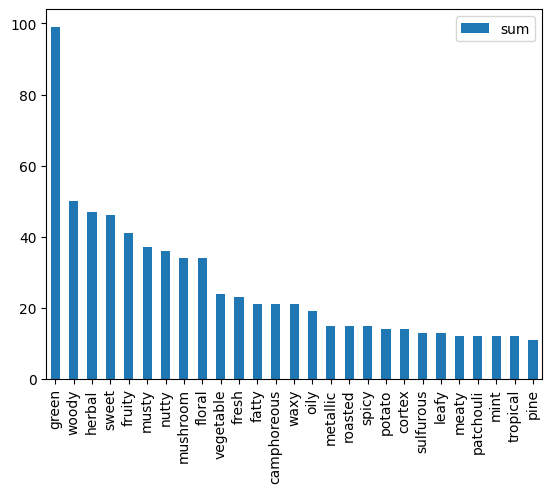

In [111]:
# All descriptors that are mentioned along with "earthy" more than 10 times.
analysis_df.query('sum>10').plot(kind='bar')

Get required labels only

In [112]:
og_columns = list(encoded_behavior.columns)
# elements of required desc not in og_columns
missing_desc = []
for req in required_desc:
    if req not in og_columns:
        missing_desc.append(req)
missing_desc

[]

In [113]:
# .remove('fruit skin') # fruit skin from required_desc missing in the goodscents dataset

In [114]:
def get_req_desc(desc_string):
    desc_list = desc_string.split(';')
    desc_set = set()
    for desc in desc_list:
        if desc in required_desc:
            desc_set.update([desc])
    return ';'.join(desc_set)

In [115]:
get_req_desc('sweet;creamy;brown;caramellic;testing')

'creamy;sweet;caramellic'

In [116]:
cid_behaviors_mol_encoded_v2['Updated_Desc_v3'] = cid_behaviors_mol_encoded_v2['Updated_Desc_v2'].apply(lambda x: get_req_desc(x))

In [117]:
cid_behaviors_mol_encoded_v2.head()

,IsomericSMILES,Updated_Desc_v2,absinthe,absolute,acacia,acetaldehyde,acetic,acetone,acidic,acorn,...,winey,wintergreen,woody,wormwood,worty,yeasty,ylang,yogurt,zesty,Updated_Desc_v3
0,CC(CN)O,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fishy
1,CC(C)C(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fruity
2,C(CC(=O)O)C(=O)C(=O)O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,odorless
3,CCC(=O)C(=O)O,creamy;lactonic;caramellic;brown;sweet,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,creamy;lactonic;sweet;caramellic
4,CC(C)CC(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fruity


In [118]:
required_goodscents_dataset = cid_behaviors_mol_encoded_v2[['IsomericSMILES', 'Updated_Desc_v3']+required_desc]

In [119]:
required_goodscents_dataset.head()

,IsomericSMILES,Updated_Desc_v3,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(CN)O,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)C(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C(CC(=O)O)C(=O)C(=O)O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCC(=O)C(=O)O,creamy;lactonic;sweet;caramellic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(C)CC(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
required_goodscents_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Columns: 140 entries, IsomericSMILES to woody
dtypes: int64(138), object(2)
memory usage: 4.9+ MB


In [121]:
required_encoded = required_goodscents_dataset.drop(columns=['IsomericSMILES', 'Updated_Desc_v3'])
required_encoded

,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,aromatic,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# molecules with no descriptors
no_desc_df = pd.DataFrame(required_encoded.sum(axis=1).sort_values(), columns=['count']).query('count==0')
no_desc_df

,count
3713,0
3968,0
425,0
1160,0
909,0
...,...
1573,0
616,0
2762,0
93,0


In [123]:
required_goodscents_dataset_v2 = required_goodscents_dataset.drop(no_desc_df.index).reset_index(drop=True)
required_goodscents_dataset_v2.head()

,IsomericSMILES,Updated_Desc_v3,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(CN)O,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)C(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C(CC(=O)O)C(=O)C(=O)O,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCC(=O)C(=O)O,creamy;lactonic;sweet;caramellic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(C)CC(=O)C(=O)O,fruity,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# required_goodscents_dataset_v2.query("Updated_Desc_v3 == None")
required_goodscents_dataset_v2[required_goodscents_dataset_v2['Updated_Desc_v3'].isna()]

,IsomericSMILES,Updated_Desc_v3,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody


In [125]:
required_goodscents_dataset_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Columns: 140 entries, IsomericSMILES to woody
dtypes: int64(138), object(2)
memory usage: 4.7+ MB


In [126]:
required_encoded_v2 = required_goodscents_dataset_v2.drop(columns=['IsomericSMILES', 'Updated_Desc_v3'])

In [127]:
# molecules with no descriptors
pd.DataFrame(required_encoded_v2.sum(axis=1).sort_values(), columns=['count']).query('count==0')

,count


In [128]:
required_encoded_v2.sum().sort_values(ascending=False)

fruity       1258
green        1090
sweet        1009
floral        921
woody         621
             ... 
ketonic        18
brandy         16
chamomile      14
gassy          12
malty          10
Length: 138, dtype: int64

In [129]:
required_goodscents_dataset_v2[required_goodscents_dataset_v2['IsomericSMILES'].duplicated(keep=False)]

,IsomericSMILES,Updated_Desc_v3,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody


In [130]:
required_goodscents_dataset_v2.to_csv('curated_goodcents.csv', index=False)

Checking nan associated values

In [131]:
nan_behaviors = pd.merge(behavior_nan, stimuli, how='inner', left_index=True, right_index=True)
nan_behaviors

,Descriptors,TGSC ID,CID,Concentration %,Solvent
Stimulus,,,,,
1523-19-9,NaN,1010921,137059,100.0,NaN
53584-56-8,NaN,1660331,439314,NaN,NaN
6698-82-0,NaN,1025691,532739,100.0,NaN
78183-56-9,NaN,1660341,447765,NaN,NaN


In [132]:
nan_behaviors_mol = pd.merge(molecules['IsomericSMILES'], nan_behaviors[['Descriptors', 'CID']],how='inner', on='CID')
nan_behaviors_mol

,CID,IsomericSMILES,Descriptors
0,137059,COC1=CC=C(C=C1)OC(=O)C2=CC=CC=C2,NaN
1,439314,C[C@H](C(=O)C)O,NaN
2,447765,C[C@@H](C(=O)C)O,NaN
3,532739,CC(C)C(=O)OC1=CC=C(C=C1)OC,NaN
